In [76]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [41]:
data = pd.read_csv('insurance.csv')

In [85]:
data_new = pd.read_csv('insurance.csv')

In [42]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
#Make dataset more useable
#0-Female 1-Male
data.sex = (data.sex == 'male').astype(int)

#smoker to binary
data.smoker = (data.smoker == 'yes').astype(int)

In [25]:
#Change region to numeric values
def region_change(word):
    if word == 'northeast':
        return 0
    if word == 'northwest':
        return 1
    if word == 'southeast':
        return 2
    if word == 'southwest':
        return 3

In [44]:
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [45]:
data.region = data.region.apply(lambda x: region_change(x))

In [46]:
data.region.value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [61]:
#Run OLS Model
regr = linear_model.LinearRegression()
Y = data.charges.values.reshape(-1,1)
X = data[['age','sex', 'bmi','children','smoker','region']]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.01505075 -0.03272034  0.00533426  0.04446958  0.67308626 -0.02067531]]

Intercept: 
 [3.05917743]

R-squared:
0.7669959067574671


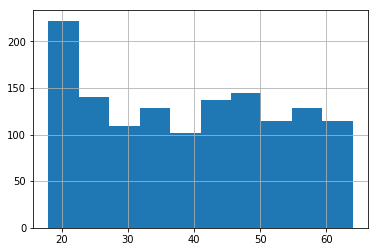

In [52]:
data.age.hist()

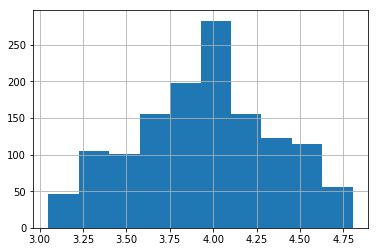

In [57]:
np.log10(data.charges).hist()

In [58]:
data.charges = np.log10(data.charges)

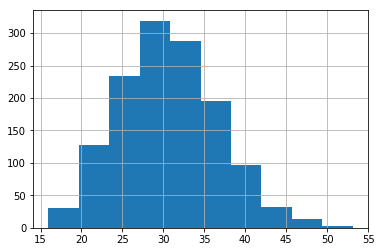

In [55]:
data.bmi.hist()

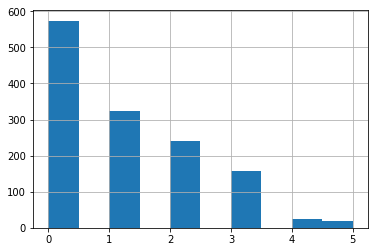

In [56]:
data.children.hist()

In [66]:
for i in range(10):
    data = data.sample(frac=1)
    Y = data.charges.values.reshape(-1,1)
    X = data[['age','sex', 'bmi','children','smoker','region']]
    print(cross_val_score(regr,X,Y, cv=4))

[0.72080551 0.77810502 0.73734359 0.80714552]
[0.74274929 0.79804738 0.72162784 0.78861196]
[0.78784963 0.75808759 0.81367975 0.67892243]
[0.74660104 0.75554656 0.74941153 0.80060486]
[0.79152964 0.76867996 0.7236329  0.76197802]
[0.76815872 0.77517949 0.76063603 0.74827486]
[0.76014451 0.68545719 0.77037358 0.83173318]
[0.76095653 0.77857859 0.78425056 0.73466619]
[0.78906194 0.77220806 0.74120835 0.75582342]
[0.78404588 0.74748504 0.7413531  0.78591273]


In [92]:
#Run kNN Model

data_neighbors = KNeighborsRegressor(n_neighbors=5)
Y_kNN = data.charges
X_kNN = data[['age', 'bmi','children','region','sex','smoker']]
data_neighbors.fit(X_kNN,Y_kNN)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [93]:
#Results
print('\nR-squared:')
print(data_neighbors.score(X_kNN, Y_kNN))


R-squared:
0.5453437926392424


In [91]:
data.charges = np.log10(data.charges)